In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

/home/edgar/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [3]:
import keras.initializers
from keras import initializers

Using TensorFlow backend.


In [4]:
mnist = tf.keras.datasets.mnist #28*28 handwritten images

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu', #activation function could be tf.nn.relu-Rectified linear Unit, tanh...
                                bias_initializer='zeros', 
                                kernel_initializer='glorot_uniform')) #Used default initializers, the initial random weights 
                                                                      #creation algothm
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #probability distribution

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

#optimzer='adam' could be stocastic gradient descent

In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 52us/step
0.08183329313881696 0.9738


In [7]:
model.save('numbers_ann_')

In [12]:
predictions = model.predict([x_test])

In [30]:
import numpy as np
print(np.argmax(predictions[11]))

6


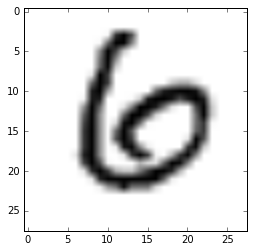

In [32]:
plt.imshow(x_test[11], cmap=plt.cm.binary)

In [25]:
print(y_test[10])

0


In [33]:
new_model = tf.keras.models.load_model('numbers_nn')

ValueError: You are trying to load a weight file containing 3 layers into a model with 0 layers.

In [9]:
import matplotlib.pyplot as plt

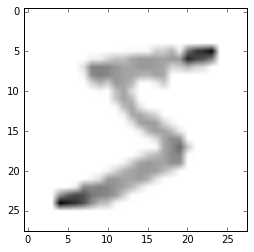

In [10]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()